<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (White wine data)

The dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. <br> Attribute information: 

**Fixed_Acidity:** The ph value for titrable acid content (0-7)

**Volatile_Acidity:** Measure of acidity due to bacteria

**Citric_Acid:** Amount of citric acid present in wine

**Residual_Sugar:** Amount of grape sugar in gms/litre

**Chlorides:** Amount of chlorides present in wine

**Free_Sulfur-dioxide:** Amount of SO2 that is not bound to other molecules

**Total_Sulfur-dioxide:** Portion of SO2 that is free in the wine plus the portion that is bound to other chemicals in the wine

**Density:** Density of wine (gms/cm<sup>3</sup>)

**pH:** The pH value of wine (0-14)

**Sulphates:** Amount of salts of sulphuric acid 

**Alcohol:** Alcohol content in percentage

**Quality:** Wine quality 

## Table of Content

1. **[Feature Transformation](#trans)**
2. **[Feature Selection](#sel)**
3. **[Model Validation](#cv)**

**Import the required libraries**

In [354]:
# type your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the first dataset and check the first two observations

In [434]:
# load your data
# type your code here

df=pd.read_csv("winequality-white.csv",sep=';')
df=df.sample(frac = 1, random_state=0)

In [435]:
# check data types of variables
# type your code here
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2762,7.3,0.32,0.35,1.40,0.050,8.0,163.0,0.99244,3.24,0.42,10.7,5
42,7.0,0.31,0.26,7.40,0.069,28.0,160.0,0.99540,3.13,0.46,9.8,6
1419,7.6,0.14,0.74,1.60,0.040,27.0,103.0,0.99160,3.07,0.40,10.8,7
3664,5.0,0.29,0.54,5.70,0.035,54.0,155.0,0.98976,3.27,0.34,12.9,8
2125,6.0,0.28,0.22,12.15,0.048,42.0,163.0,0.99570,3.20,0.46,10.1,5


### Let's begin with some hands-on practice exercises

<a id="trans"> </a>
## 1. Feature Transformation

## We shall use the wine quality dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Does the variable 'volatile acidity' need transformation ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [357]:
# type your code here
from scipy.stats import jarque_bera

print('Original data: ',jarque_bera(df['volatile acidity']))

# H0: the data is normally distributed
# HA: the data is not normally distributed.

Original data:  (7306.320881466652, 0.0)


### Conclusion:
    
    We can see that the pvalue <0.05 for original data. Hence we reject H0, ie; the data is not normally distributed.
    Hence it is good to transform the data to normally distributed data.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. How can we reduce skewness of variable 'Residual_Sugar'?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

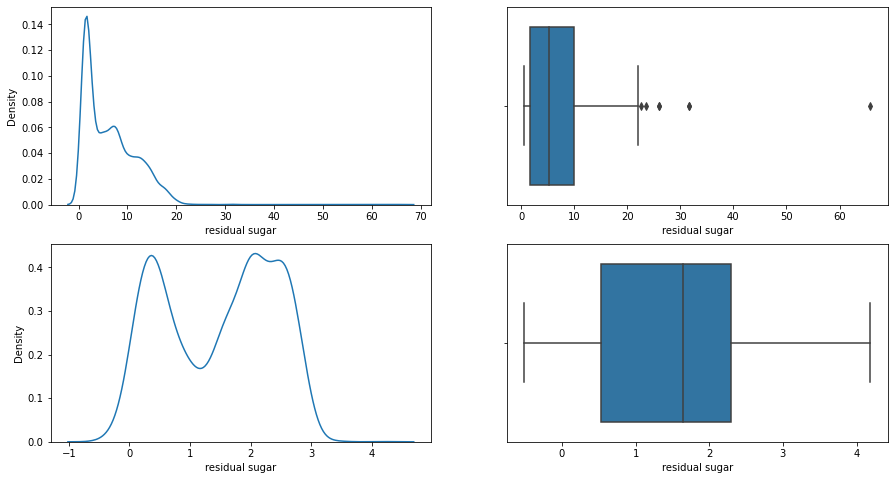

Original data:  (3396.8207586924946, 0.0)
Transformed data:  (394.3386616691604, 0.0)


In [358]:
# type your code here
fig,axes = plt.subplots(2,2,figsize=(15,8))
sns.kdeplot(df['residual sugar'],ax=axes[0,0])
sns.boxplot(x=df['residual sugar'],ax=axes[0,1])
sns.kdeplot(np.log(df['residual sugar']),ax=axes[1,0])
sns.boxplot(x=np.log(df['residual sugar']),ax=axes[1,1])
plt.show()

print('Original data: ',jarque_bera(df['residual sugar']))
print('Transformed data: ',jarque_bera(np.log(df['residual sugar'])))


### Conclusion:
We can see that the origial data is highly right skewed and there are outliers in the data.

When we perform a log transform it somewhat reduces the skewness and has taken care of the outliers

The statistic has come down considerably showing an improvement in the data.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Are there features in the dataset that add little to no information ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [359]:
# type your code here
import statsmodels.api as sm

y=df['quality']
x=df.drop(columns='quality')
xc=sm.add_constant(x)

model = sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Sat, 02 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:25:54   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  150.1928     18.804      7.987      0.000     113.328     187.057
fixed acidity            0.0655      0.021      3.139      0.002       0.025       0.106
volatile acidity        -1.8632      0.114    -16.373      0.000      -2.086      -1.640
citric acid              0.0221      0.096      0.231      0.818      -0.166       0.210
residual sugar           0.0815      0.008     10.825      0.000       0.067       0.096
chlorides               -0.2473      0.547     -0.452      0.651      -1.319       0.824
free sulfur dioxide      0.0037      0.001      4.422      0.000       0.002       0.005
total sulfur dioxide    -0.0003      0.000     -0.756      0.450      -0.001       0.000
density               -150.2842     19.075     -7.879      0.000    -187.679    -112.890
pH                       0.6863      0.105      6.513      0.000       0.480       0.893
sulphates                0.6315      0.100      6.291      0.000       0.435       0.828
alcohol                  0.1935      0.024      7.988      0.000       0.146       0.241
==============================================================================
Omnibus:                      114.161   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.637
Skew:                           0.073   Prob(JB):                     2.28e-55
Kurtosis:                       4.101   Cond. No.                     3.74e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [360]:
allc= list(xc.columns)
cols = list(xc.columns)
while len(cols)>0:
    X=xc[cols]
    model= sm.OLS(y,X).fit()
    p = model.pvalues
    p = p.drop('const')
    p.sort_values(ascending=True)
    pmax = max(p)
    feature_pmax = p.idxmax()
    if pmax > 0.05:
        cols.remove(feature_pmax)
    else:
        break
    
novalue= [i for i in allc if i not in cols]
print('Features that add no value to the model :',novalue)

Features that add no value to the model : ['citric acid', 'chlorides', 'total sulfur dioxide']


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Which transformation method is best suited to treat the skewness in variable 'alcohol'?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

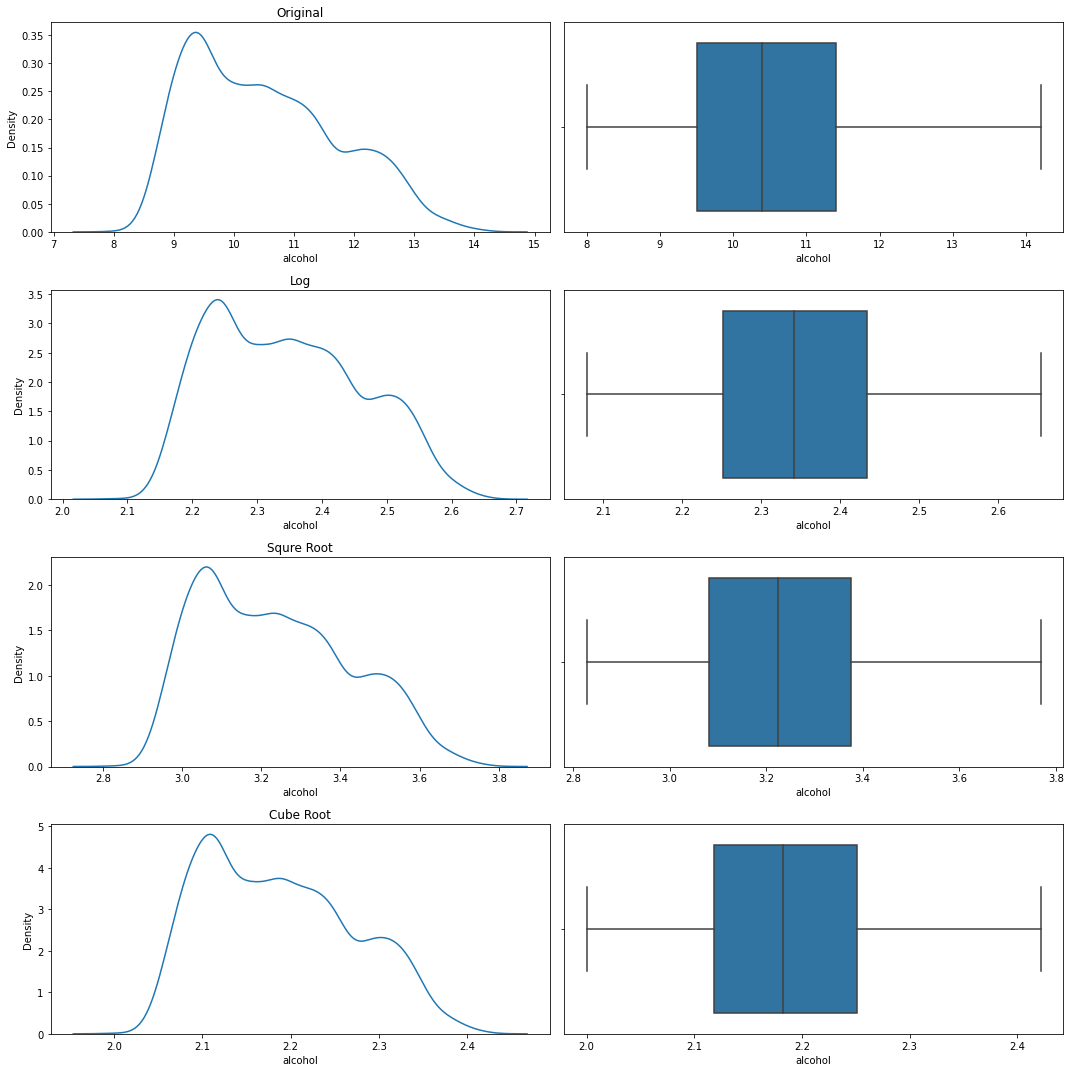

Original data:  (293.45966765765604, 0.0)
Log Transformed data:  (242.4528654603542, 0.0)
Square Root Transformed data:  (262.7683694816862, 0.0)
Cube Root Transformed data:  (254.99367438556746, 0.0)


In [361]:
# type your code here
fig,axes = plt.subplots(4,2,figsize=(15,15))
sns.kdeplot(df['alcohol'],ax=axes[0,0])
sns.boxplot(x=df['alcohol'],ax=axes[0,1])
sns.kdeplot(np.log(df['alcohol']),ax=axes[1,0])
sns.boxplot(x=np.log(df['alcohol']),ax=axes[1,1])
sns.kdeplot(np.sqrt(df['alcohol']),ax=axes[2,0])
sns.boxplot(x=np.sqrt(df['alcohol']),ax=axes[2,1])
sns.kdeplot((df['alcohol']**(1/3)),ax=axes[3,0])
sns.boxplot(x=(df['alcohol']**(1/3)),ax=axes[3,1])
axes[0,0].set_title('Original')
axes[1,0].set_title('Log')
axes[2,0].set_title('Squre Root')
axes[3,0].set_title('Cube Root')
plt.tight_layout()
plt.show()

print('Original data: ',jarque_bera(df['alcohol']))
print('Log Transformed data: ',jarque_bera(np.log(df['alcohol'])))
print('Square Root Transformed data: ',jarque_bera(np.sqrt(df['alcohol'])))
print('Cube Root Transformed data: ',jarque_bera(df['alcohol']**(1/3)))

### Conclusion:
From above plots and values it is clear that the Log transform gives the best result, as it has the least Jarque Bera statistic value

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Does scaling the feature 'pH' lead to better prediction when considering a full model ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [362]:
# type your code here
import statsmodels.api as sm

y=df['quality']
x=df.drop(columns='quality')
xc=sm.add_constant(x)

model = sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Sat, 02 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:25:56   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  150.1928     18.804      7.987      0.000     113.328     187.057
fixed acidity            0.0655      0.021      3.139      0.002       0.025       0.106
volatile acidity        -1.8632      0.114    -16.373      0.000      -2.086      -1.640
citric acid              0.0221      0.096      0.231      0.818      -0.166       0.210
residual sugar           0.0815      0.008     10.825      0.000       0.067       0.096
chlorides               -0.2473      0.547     -0.452      0.651      -1.319       0.824
free sulfur dioxide      0.0037      0.001      4.422      0.000       0.002       0.005
total sulfur dioxide    -0.0003      0.000     -0.756      0.450      -0.001       0.000
density               -150.2842     19.075     -7.879      0.000    -187.679    -112.890
pH                       0.6863      0.105      6.513      0.000       0.480       0.893
sulphates                0.6315      0.100      6.291      0.000       0.435       0.828
alcohol                  0.1935      0.024      7.988      0.000       0.146       0.241
==============================================================================
Omnibus:                      114.161   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.637
Skew:                           0.073   Prob(JB):                     2.28e-55
Kurtosis:                       4.101   Cond. No.                     3.74e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [363]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

df1=df.copy()

df1['SS_pH']= ss.fit_transform(df1[['pH']])
df1=df1.drop('pH',axis=1)
y=df1['quality']
x=df1.drop(columns='quality')
xc=sm.add_constant(x)

model_ss = sm.OLS(y,xc).fit()
model_ss.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Sat, 02 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:25:56   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  152.3811     19.013      8.015      0.000     115.108     189.655
fixed acidity            0.0655      0.021      3.139      0.002       0.025       0.106
volatile acidity        -1.8632      0.114    -16.373      0.000      -2.086      -1.640
citric acid              0.0221      0.096      0.231      0.818      -0.166       0.210
residual sugar           0.0815      0.008     10.825      0.000       0.067       0.096
chlorides               -0.2473      0.547     -0.452      0.651      -1.319       0.824
free sulfur dioxide      0.0037      0.001      4.422      0.000       0.002       0.005
total sulfur dioxide    -0.0003      0.000     -0.756      0.450      -0.001       0.000
density               -150.2842     19.075     -7.879      0.000    -187.679    -112.890
sulphates                0.6315      0.100      6.291      0.000       0.435       0.828
alcohol                  0.1935      0.024      7.988      0.000       0.146       0.241
SS_pH                    0.1036      0.016      6.513      0.000       0.072       0.135
==============================================================================
Omnibus:                      114.161   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.637
Skew:                           0.073   Prob(JB):                     2.28e-55
Kurtosis:                       4.101   Cond. No.                     3.76e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Conclusion:

We observe that the Adj R2 and R2 of both the models remain unchanged. So in terms of model performance not much changes occured.

The Coefficient of the pH reduced after scaling was applied.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. What could be done to resolve the issue of multicollinearity if present?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

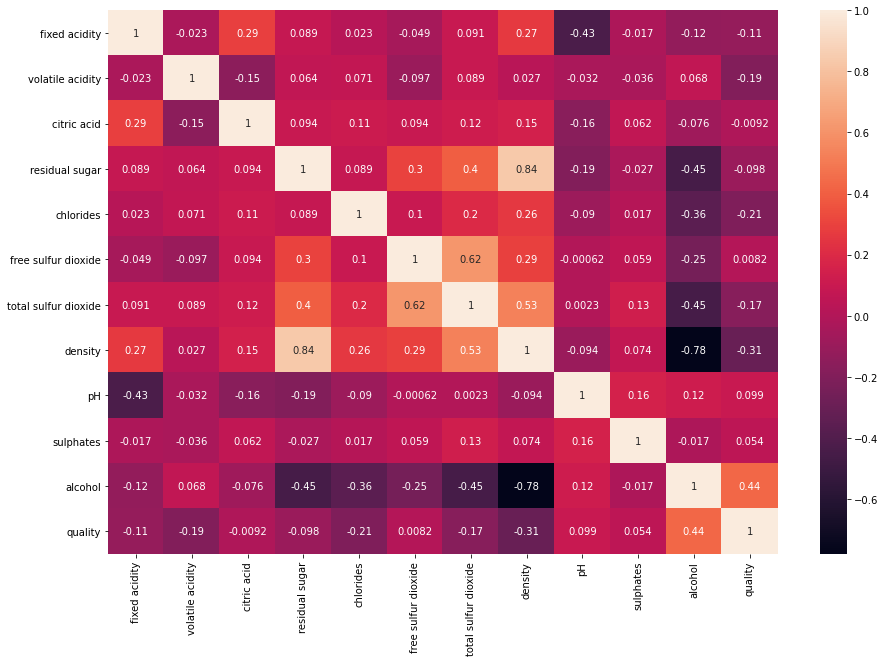

In [364]:
# We can take the correlation matrix
# when multicollinearity is observed we can check for insignificant variables with high vif values and drop them.

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [365]:
# Feature selection

cols = list(xc.columns)
while len(cols)>0:
    X=xc[cols]
    model= sm.OLS(y,X).fit()
    p = model.pvalues
    p = p.drop('const')
    p.sort_values(ascending=True)
    pmax = max(p)
    feature_pmax = p.idxmax()
    if pmax > 0.05:
        cols.remove(feature_pmax)
    else:
        break

In [366]:
xc=xc[cols]
model = sm.OLS(y,xc)

from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

vif = [VIF(xc.values,i) for i in range(xc.shape[1])]

pd.DataFrame(vif, index=xc.columns,columns=['VIF'])

,VIF
const,2.907755e+06
fixed acidity,2.579640e+00
volatile acidity,1.057310e+00
residual sugar,1.185425e+01
free sulfur dioxide,1.149027e+00
density,2.612315e+01
sulphates,1.129688e+00
alcohol,7.622843e+00
SS_pH,2.113597e+00


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7.  Fit a full model. Is the assumption for normality of residuals violated ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [367]:
# type your code here

y=df['quality']
x=df.drop(columns='quality')
xc=sm.add_constant(x)

model = sm.OLS(y,xc).fit()
residual= model.resid

In [368]:
# H0: the data is normally distributed
# HA: the data is not normally distributed.

jarque_bera(residual)

(251.6368168070483, 0.0)

### Conclusion:
We see that the pvalue of jarque bera test is <0, hence we reject the H0, ie; the residuals are not normally distributed.
Hence we can conclude that the normality of the residuals are violated

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Does the transformation of variable 'citric acid' affect the performance of prediction model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [369]:
# type your code here
y=df['quality']
x=df.drop(columns='quality')
xc=sm.add_constant(x)

model = sm.OLS(y,xc).fit()

df1= df.copy()
df1['Tra_CA']=np.log1p(df['citric acid'])
df1 = df1.drop(columns='citric acid')
y1= df1['quality']
x1 = df1.drop(columns='quality')
x1c = sm.add_constant(x1)
model_1=sm.OLS(y1,x1c).fit()

In [370]:
print('Original model : ',model.rsquared_adj)
print('Transformed citric acid model : ',model_1.rsquared_adj)

Original model :  0.2802536171020674
Transformed citric acid model :  0.2803214013847496


### Conclusion:

When we compare the R2 value of the model with original citric acid vlaues and transformed citric acid values we see that the change is miniscule increase of R2.

Hence we can conclude the model performance is unaffected by the transformation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Fit a full model. Check whether variable has linear relationship with the wine quality<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [371]:
# type your code here
y=df['quality']
x=df.drop(columns='quality')
xc=sm.add_constant(x)

model = sm.OLS(y,xc).fit()
ypred= model.predict(xc)

import statsmodels.stats.api as sms

# H0: Model is linear
# HA: Model is not linear

sms.diagnostic.linear_rainbow(res=model,frac=0.5)

(1.078357793388899, 0.031171323484583492)

pvalue > 0.05 we accept H0, ie; the model is linear. Hence we can conclude that the relation between the variables with wine quality is linear

<a id="sel"> </a>
## 2. Feature Selection

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Find the top five significant variables from the dataset using forward selection technique. Also display the R-squared score for the model built using these five variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [418]:
# type your code here
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

y=df['quality']
x=df.drop(columns='quality')

lr=LinearRegression()

sfs= SFS(lr,k_features=5,forward=True,cv=5)
sfs.fit(x,y)

SequentialFeatureSelector(clone_estimator=True, cv=5,
                          estimator=LinearRegression(copy_X=True,
                                                     fit_intercept=True,
                                                     n_jobs=None,
                                                     normalize=False),
                          fixed_features=None, floating=False, forward=True,
                          k_features=5, n_jobs=1, pre_dispatch='2*n_jobs',
                          scoring=None, verbose=0)

In [419]:
print('The five features selected are : ',sfs.k_feature_names_)
print('The R2 value for the model with 5 features is :',sfs.k_score_)

The five features selected are :  ('volatile acidity', 'residual sugar', 'density', 'pH', 'alcohol')
The R2 value for the model with 5 features is : 0.26852468191611417


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>11. Find the top five significant variables from the dataset using backward elimination technique. Also display the R-squared score for the model built using these five variables.<br><br> Compare the R-squared value obtained from question 10 with the value obtained using backward elimination.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [374]:
# type your code here
from sklearn.feature_selection import RFE

y=df['quality']
x=df.drop(columns='quality')

lr=LinearRegression()

rfe= RFE(lr, n_features_to_select=5)

rfe.fit(x,y)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=5, step=1, verbose=0)

In [375]:
rfe.score(x,y)

0.24990527897718162

In [376]:
rfe_df=list(zip(x.columns,rfe.ranking_))
rfe_df=pd.DataFrame(rfe_df,columns=['Feature_names','Ranking'])
print('Selected features are: \n',rfe_df[rfe_df['Ranking']==1]['Feature_names'].values)

Selected features are: 
 ['volatile acidity' 'chlorides' 'density' 'sulphates' 'alcohol']


In [377]:
print('The R2 value for the model with 5 features through forward selection :',sfs.k_score_)
print('The R2 value for the model with 5 features through backward selection :',rfe.score(x,y))

The R2 value for the model with 5 features through forward selection : 0.26852468191611417
The R2 value for the model with 5 features through backward selection : 0.24990527897718162


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Find the best set of significant variables from the dataset using forward selection technique such that the selected set should have 2 to 6 features. Also display the R-squared score for the model built using the selected variables</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [378]:
# type your code here
y=df['quality']
x=df.drop(columns='quality')

lr=LinearRegression()

sfs= SFS(lr,k_features=6,forward=True,cv=5)
sfs.fit(x,y)

SequentialFeatureSelector(clone_estimator=True, cv=5,
                          estimator=LinearRegression(copy_X=True,
                                                     fit_intercept=True,
                                                     n_jobs=None,
                                                     normalize=False),
                          fixed_features=None, floating=False, forward=True,
                          k_features=6, n_jobs=1, pre_dispatch='2*n_jobs',
                          scoring=None, verbose=0)

In [379]:
sfs_df=pd.DataFrame(sfs.subsets_).T
sfs_df[sfs_df['avg_score']==sfs_df['avg_score'].max()]

,feature_idx,cv_scores,avg_score,feature_names
6,"(1, 3, 7, 8, 9, 10)","[0.26305939248668564, 0.28259670118379243, 0.3...",0.273918,"(volatile acidity, residual sugar, density, pH..."


### We can see that the maximum avg score for 6 features

In [380]:
print('The R2 value for model with 6 features is: ',sfs.k_score_)

The R2 value for model with 6 features is:  0.2739175370624004


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Find the best set of significant variables from the dataset using forward selection technique. Also display the R-squared score for the model built using the selected variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [381]:
# type your code here
y=df['quality']
x=df.drop(columns='quality')

lr=LinearRegression()

sfs= SFS(lr,k_features=len(x.columns),forward=True,cv=5)
sfs.fit(x,y)

SequentialFeatureSelector(clone_estimator=True, cv=5,
                          estimator=LinearRegression(copy_X=True,
                                                     fit_intercept=True,
                                                     n_jobs=None,
                                                     normalize=False),
                          fixed_features=None, floating=False, forward=True,
                          k_features=11, n_jobs=1, pre_dispatch='2*n_jobs',
                          scoring=None, verbose=0)

In [382]:
sfs_df=pd.DataFrame(sfs.subsets_).T

features=list(sfs_df[sfs_df['avg_score']==sfs_df['avg_score'].max()]['feature_names'])
num_of_var=len(features[0])
R2_val = sfs_df[sfs_df['avg_score']==sfs_df['avg_score'].max()]['avg_score'].values

print('Number of features selected = ',num_of_var)
print('Feature names : ',features)
print('R2 value of the model with these features : ',R2_val)

Number of features selected =  9
Feature names :  [('fixed acidity', 'volatile acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol')]
R2 value of the model with these features :  [0.2754682822110691]


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Find the best set of significant variables from the dataset using backward elimination technique. Also display the R-squared score for the model built using the selected variables. <br><br>Compare the R-squared value obtained from question 13 with the value obtained using backward elimination.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [383]:
# type your code here
from sklearn.model_selection import KFold, GridSearchCV

y=df['quality']
x=df.drop(columns='quality')

lr = LinearRegression()

kfold = KFold(n_splits=5,shuffle=True,random_state=4)

rfe = RFE(lr)

params=[{'n_features_to_select':list(range(1,12))}]

gsearch = GridSearchCV(rfe, param_grid=params, scoring='r2',cv=kfold)

gsearch.fit(x,y)

GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [384]:
gsearch.best_params_

{'n_features_to_select': 10}

In [385]:
rfe= RFE (lr,n_features_to_select=10)
rfe.fit(x,y)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=10, step=1, verbose=0)

In [386]:
print('R2 of Backward elimination :',rfe.score(x,y))
print('R2 of Forward elimination :',R2_val)

R2 of Backward elimination : 0.281786400623662
R2 of Forward elimination : [0.2754682822110691]


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Find the best set of significant variables from the dataset among all the possible subsets of the variables. Build a linear regression model using the best subset and find the R-Squared value for that model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [387]:
# type your code here
from sklearn.model_selection import KFold, GridSearchCV

y=df['quality']
x=df.drop(columns='quality')

lr = LinearRegression()

kfold = KFold(n_splits=5,shuffle=True,random_state=4)

rfe = RFE(lr)

params=[{'n_features_to_select':list(range(1,12))}]

gsearch = GridSearchCV(rfe, param_grid=params, scoring='r2',cv=kfold)

gsearch.fit(x,y)
gsearch.best_params_

{'n_features_to_select': 10}

In [388]:
rfe = RFE(lr, n_features_to_select=10)
rfe.fit(x,y)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=10, step=1, verbose=0)

In [402]:
rfe_df = pd.DataFrame(rfe.support_,index=x.columns,columns=['Selected'])
sel_feat = rfe_df[rfe_df['Selected']==True].index

In [415]:
x=df[sel_feat]
y=df['quality']

lr=LinearRegression()

lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [414]:
from sklearn.model_selection import cross_val_score,KFold

kfold=KFold(n_splits=5,shuffle=True,random_state=0)
cv= cross_val_score(lr,x,y,cv=kfold,scoring='r2')

print('Mean R2 for Linear model with selected features : ',cv.mean())

Mean R2 for Linear model with selected features :  0.27639834738194935


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Calculate the RMSE for the train set and test set for the model created using the top 5 variables obtained from forward selection in question 10. Check if the model is overfitted on the train set or not. If yes, then why do you think so?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [424]:
# type your code here
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y=df['quality']
x=df.drop(columns='quality')

lr=LinearRegression()

sfs= SFS(lr,k_features=5,forward=True,cv=5)
sfs.fit(x,y)

features= list(sfs.k_feature_names_)

x=x[features]

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3, random_state=0)

lr.fit(xtrain,ytrain)

ypred_train = lr.predict(xtrain)
ypred_test  = lr.predict(xtest)

rmse_train = np.sqrt(mean_squared_error(ytrain, ypred_train))
rmse_test  = np.sqrt(mean_squared_error(ytest, ypred_test))

print('RMSE for train : ',rmse_train)
print('RMSE for test  :',rmse_test)

RMSE for train :  0.7585894867804878
RMSE for test  : 0.7504643068399192


In [425]:
lr.score(xtrain,ytrain)

0.27560451836396516

In [426]:
lr.score(xtest,ytest)

0.2580119931275542

<a id="cv"> </a>
## 3. Model Validation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Create a new feature based on the 'pH' which tells whether wine is acidic, basic or neutral. Will this variable significantly contribute to the model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [464]:
# type your code here
l=[]

for i in df['pH']:
    if 0 <= i < 7:
        l.append('Acidic')
    elif i == 7:
        l.append('Neutral')
    elif 7 < i <=14:
        l.append('Basic')
    else:
        l.append(np.nan)
df['nature']=l

In [466]:
df['nature'].value_counts()

Acidic    4898
Name: nature, dtype: int64

In [470]:
df = pd.get_dummies(df,columns=['nature'],drop_first=0)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,nature_Acidic
2762,7.3,0.32,0.35,1.40,0.050,8.0,163.0,0.99244,3.24,0.42,10.7,5,1
42,7.0,0.31,0.26,7.40,0.069,28.0,160.0,0.99540,3.13,0.46,9.8,6,1
1419,7.6,0.14,0.74,1.60,0.040,27.0,103.0,0.99160,3.07,0.40,10.8,7,1
3664,5.0,0.29,0.54,5.70,0.035,54.0,155.0,0.98976,3.27,0.34,12.9,8,1
2125,6.0,0.28,0.22,12.15,0.048,42.0,163.0,0.99570,3.20,0.46,10.1,5,1


In [471]:
x = df['nature_Acidic']
y = df['quality']
xc = sm.add_constant(x)
model = sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 02 Jan 2021   Prob (F-statistic):                nan
Time:                        19:31:52   Log-Likelihood:                -6354.6
No. Observations:                4898   AIC:                         1.271e+04
Df Residuals:                    4897   BIC:                         1.272e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
nature_Acidic     5.8779      0.013    464.489      0.000       5.853       5.903
==============================================================================
Omnibus:                       27.683   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.243
Skew:                           0.156   Prob(JB):                     4.47e-07
Kurtosis:                       3.215   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Conclusion:

Though the pvalue is 0.00, we see that the R2 of the model is also 0, ie; the nature is able to interpret 0% of the variation in the quality.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Fit the a full model. Validate the model using cross validation method</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [476]:
# type your code here
x= df.drop(columns = 'quality')
y= df['quality']

xtrain,xtest,ytrain,ytest =train_test_split(x,y, test_size = 0.3, random_state = 0)

lr=LinearRegression()
lr.fit(xtest,ytest)

kfold= KFold(n_splits=3, shuffle=True, random_state=0)

cv= cross_val_score(lr,x,y, cv= kfold, scoring='r2')
print('The mean R2 value of the full linear model is = ',cv.mean())

The mean R2 value of the full linear model is =  0.27304759126792905


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Fit the a full model. Validate the model using 5 - fold cross validation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [477]:
# type your code here
x= df.drop(columns = 'quality')
y= df['quality']

xtrain,xtest,ytrain,ytest =train_test_split(x,y, test_size = 0.3, random_state = 0)

lr=LinearRegression()
lr.fit(xtest,ytest)

kfold= KFold(n_splits=5, shuffle=True, random_state=0)

cv= cross_val_score(lr,x,y, cv= kfold, scoring='r2')
print('The mean R2 value of the full linear model is = ',cv.mean())

The mean R2 value of the full linear model is =  0.27647439282204866


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Fit the a full model. Validate the model using leave one out cross validation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [484]:
# type your code here
from sklearn.model_selection import LeaveOneOut

x= df.drop(columns = 'quality')
y= df['quality']

xtrain,xtest,ytrain,ytest =train_test_split(x,y, test_size = 0.3, random_state = 0)

lr=LinearRegression()
lr.fit(xtest,ytest)

loo=LeaveOneOut()

cv= cross_val_score(lr,x,y, cv= loo, scoring='neg_mean_squared_error')
print('The RMSE value of the full linear model leave one out cv is = ',np.sqrt(np.mean(cv*-1)))

The RMSE value of the full linear model leave one out cv is =  0.754112058474323
